<a href="https://colab.research.google.com/github/yasanthinadun/4339_COMP_SCI_7318-Deep-Learning-Fundamentals/blob/main/Assessment_3_RNNs_for_stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
# Importing necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, GRU, Bidirectional
from keras.optimizers import SGD

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import math
from datetime import date, timedelta, datetime

import warnings
warnings.filterwarnings("ignore")



In [43]:
 # Setting the timeframe for the data extraction
end_date =  date.today().strftime("%Y-%m-%d")
start_date = '2013-01-01'
import yfinance as yf
data = yf.download('CSL', start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [44]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2742.000000,2742.000000,2742.000000,2742.000000,2742.000000,2.742000e+03
mean,137.608476,139.077155,136.205886,137.640620,130.612399,3.879507e+05
std,63.297500,64.217292,62.477236,63.329414,65.309862,2.279996e+05
min,59.639999,60.000000,59.189999,59.509998,51.813087,5.970000e+04
25%,93.824999,94.580002,93.257500,93.965000,84.502012,2.488750e+05
50%,110.139999,111.049999,109.150002,110.235001,102.015961,3.365000e+05
75%,161.917496,163.312496,160.965000,162.122494,154.737732,4.605500e+05
max,314.739990,318.709991,313.399994,316.140015,310.887695,3.164400e+06


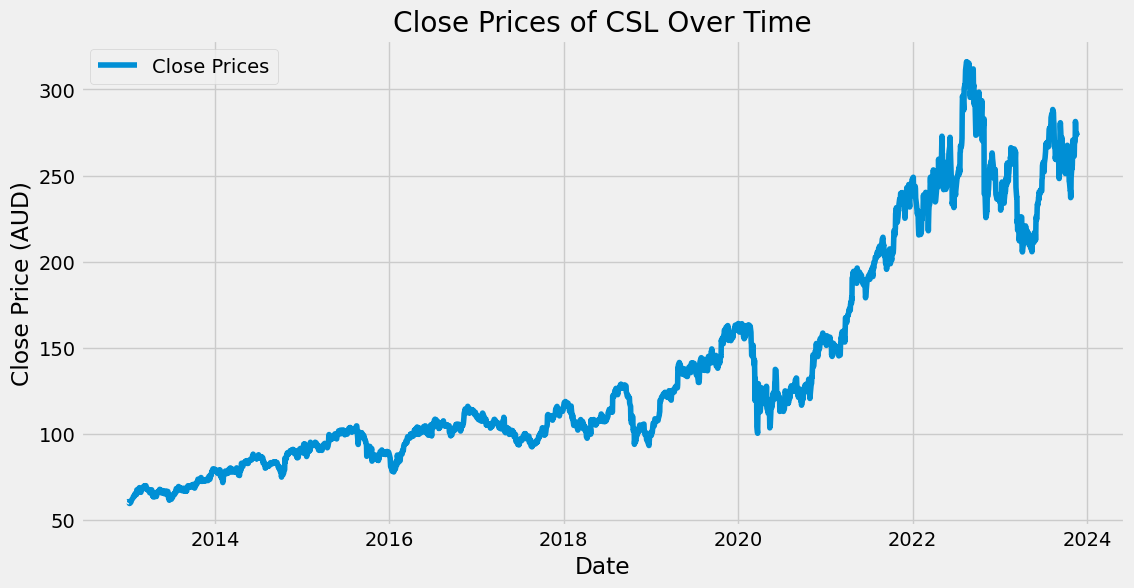

In [45]:
# Plotting the "Close" attribute
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Close Prices')
plt.title('Close Prices of CSL Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price (AUD)')
plt.legend()
plt.show()

In [46]:
#The root mean squared error calculation function
def return_rmse(test, predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("the root mean squared error is : {}.".format(rmse))

In [47]:
# function to get the plots of stock prices
def plot_predictions(test, predicted):
    plt.plot(test, color="red", label="The real stock price of CSL")
    plt.plot(predicted, color="blue", label="Predicted stock price of CSL")
    plt.title("The stock price prediction of CSL")
    plt.xlabel("time")
    plt.ylabel("Stock price of CSL")
    plt.legend()
    plt.show()


In [48]:
# Calculate percentage change to get the residual price
data['Residual Price'] = data['Close'].pct_change()

In [49]:
# Remove the first row from the calculation of the percentage change since it will contain a NaN value.
data = data.dropna()

In [50]:
# Display the modified data
print(data.head())

                 Open       High        Low      Close  Adj Close  Volume  \
Date                                                                        
2013-01-03  60.439999  61.029999  60.099998  60.560001  52.727272  501100   
2013-01-04  60.500000  60.639999  60.139999  60.549999  52.718559  151300   
2013-01-07  60.290001  60.360001  59.660000  59.930000  52.178757  275800   
2013-01-08  59.680000  60.009998  59.250000  59.509998  51.813087  276600   
2013-01-09  59.639999  60.000000  59.200001  59.770000  52.039448  583600   

            Residual Price  
Date                        
2013-01-03        0.001323  
2013-01-04       -0.000165  
2013-01-07       -0.010239  
2013-01-08       -0.007008  
2013-01-09        0.004369  


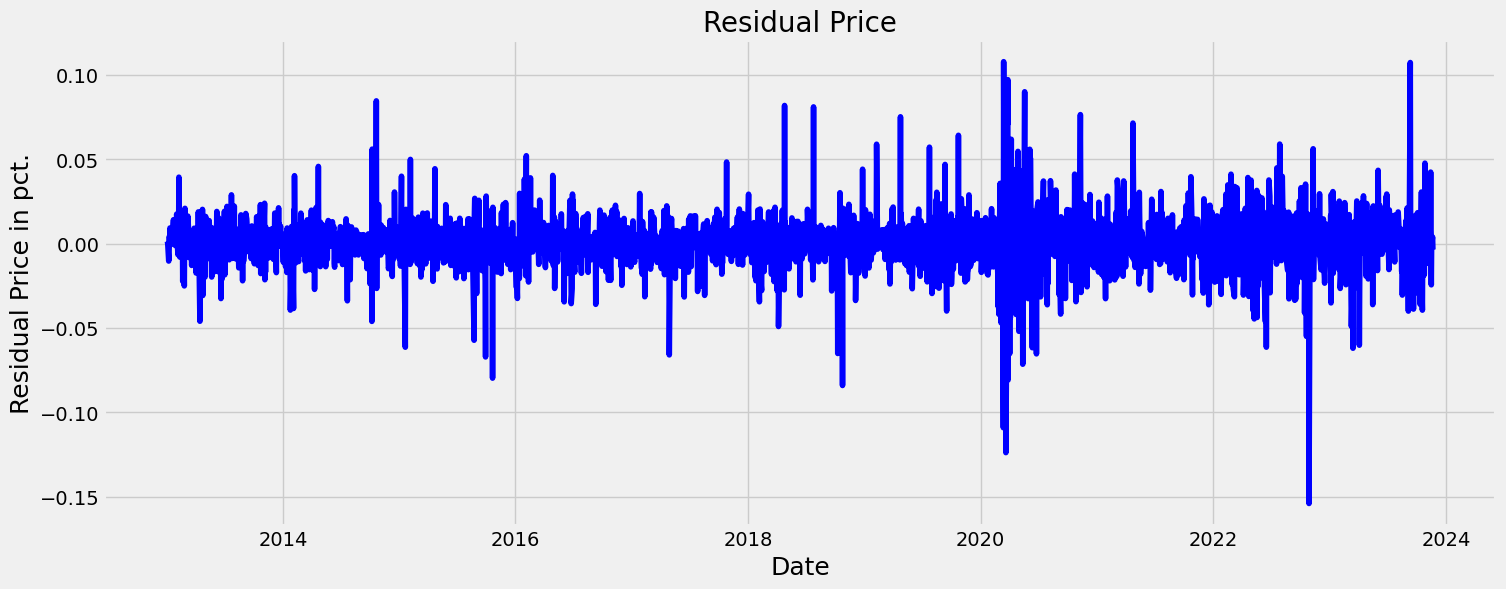

In [51]:
# Get the residual price of the stock CSL over the last 10 years.
plt.figure(figsize=(16,6))
plt.title('Residual Price of CSL')
plt.plot(data['Residual Price'], color = "blue")
plt.xlabel('Date', fontsize=18)
plt.ylabel('Residual Price in pct.', fontsize=18)
plt.title('Residual Price', fontsize = 20)
plt.show()

In [52]:
# Create a new dataframe with only the 'Close' value column
df = data.filter(['Close'])

# Dataframe conversion to a numpy array
dataset = df.values

# Get the number of rows to train using 80% traing and 20% test
training_data_len = int(np.ceil( len(dataset) * .8 ))

training_data_len

2193

In [53]:
# Scale the data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)


In [54]:
# Creating the scaled training data set
train_data = scaled_data[0:training_data_len  , : ]

# Splitting the data into data sets for x_train and y_train
x_train=[]
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

[array([0.00409151, 0.00405253, 0.00163661, 0.        , 0.00101314,
       0.00093521, 0.00311734, 0.00300043, 0.00463704, 0.0063126 ,
       0.00775436, 0.0085337 , 0.01196276, 0.01270312, 0.01414488,
       0.01609321, 0.01582045, 0.01788567, 0.01780775, 0.01808052,
       0.02248373, 0.02170441, 0.02006782, 0.02061335, 0.02069127,
       0.03066671, 0.02860149, 0.02961463, 0.03179675, 0.03109535,
       0.03300473, 0.03588825, 0.02992637, 0.02844562, 0.03183572,
       0.02525036, 0.02762732, 0.03308265, 0.0325761 , 0.03199159,
       0.03249815, 0.03386197, 0.03409579, 0.03390095, 0.03826522,
       0.03986283, 0.03764174, 0.03939525, 0.04029147, 0.03896662,
       0.04033044, 0.03849901, 0.03503098, 0.03218641, 0.0332775 ,
       0.03121224, 0.0310564 , 0.02984842, 0.03226436, 0.03097845])]
[0.028874252332092704]

[array([0.00409151, 0.00405253, 0.00163661, 0.        , 0.00101314,
       0.00093521, 0.00311734, 0.00300043, 0.00463704, 0.0063126 ,
       0.00775436, 0.0085337 , 0.0

In [55]:
# Create numpy arrays from the x_train and y_train.
x_train, y_train = np.array(x_train), np.array(y_train)

In [56]:
# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


**LSTM model**

In [57]:
# LSTM architecture
model = Sequential()

# add first layer with dropout
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

# add second layer
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

# add third layer
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

# add fourth layer
model.add(LSTM(units=50))
model.add(Dropout(0.2))

# the output layer
model.add(Dense(units=1))

In [58]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [59]:
#Train the model
model.fit(x_train, y_train, epochs=40, batch_size=32)

Epoch 1/40
67/67 [==============================] - 17s 137ms/step - loss: 0.0038
Epoch 2/40
67/67 [==============================] - 7s 108ms/step - loss: 0.0011
Epoch 3/40
67/67 [==============================] - 9s 136ms/step - loss: 0.0011
Epoch 4/40
67/67 [==============================] - 9s 137ms/step - loss: 9.3197e-04
Epoch 5/40
67/67 [==============================] - 8s 115ms/step - loss: 8.1013e-04
Epoch 6/40
67/67 [==============================] - 9s 136ms/step - loss: 9.6817e-04
Epoch 7/40
67/67 [==============================] - 7s 109ms/step - loss: 7.6232e-04
Epoch 8/40
67/67 [==============================] - 9s 138ms/step - loss: 7.1029e-04
Epoch 9/40
67/67 [==============================] - 8s 122ms/step - loss: 8.0276e-04
Epoch 10/40
67/67 [==============================] - 8s 124ms/step - loss: 6.7659e-04
Epoch 11/40
67/67 [==============================] - 9s 138ms/step - loss: 7.9630e-04
Epoch 12/40
67/67 [==============================] - 7s 109ms/step - loss:

In [60]:
#Creating the testing data set
test_data = scaled_data[training_data_len - 60: , :]

#Create the x_test and y_test data sets
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))


In [61]:
# Get the models predicted prices
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

18/18 [==============================] - 2s 30ms/step


In [62]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

12.228806439701014

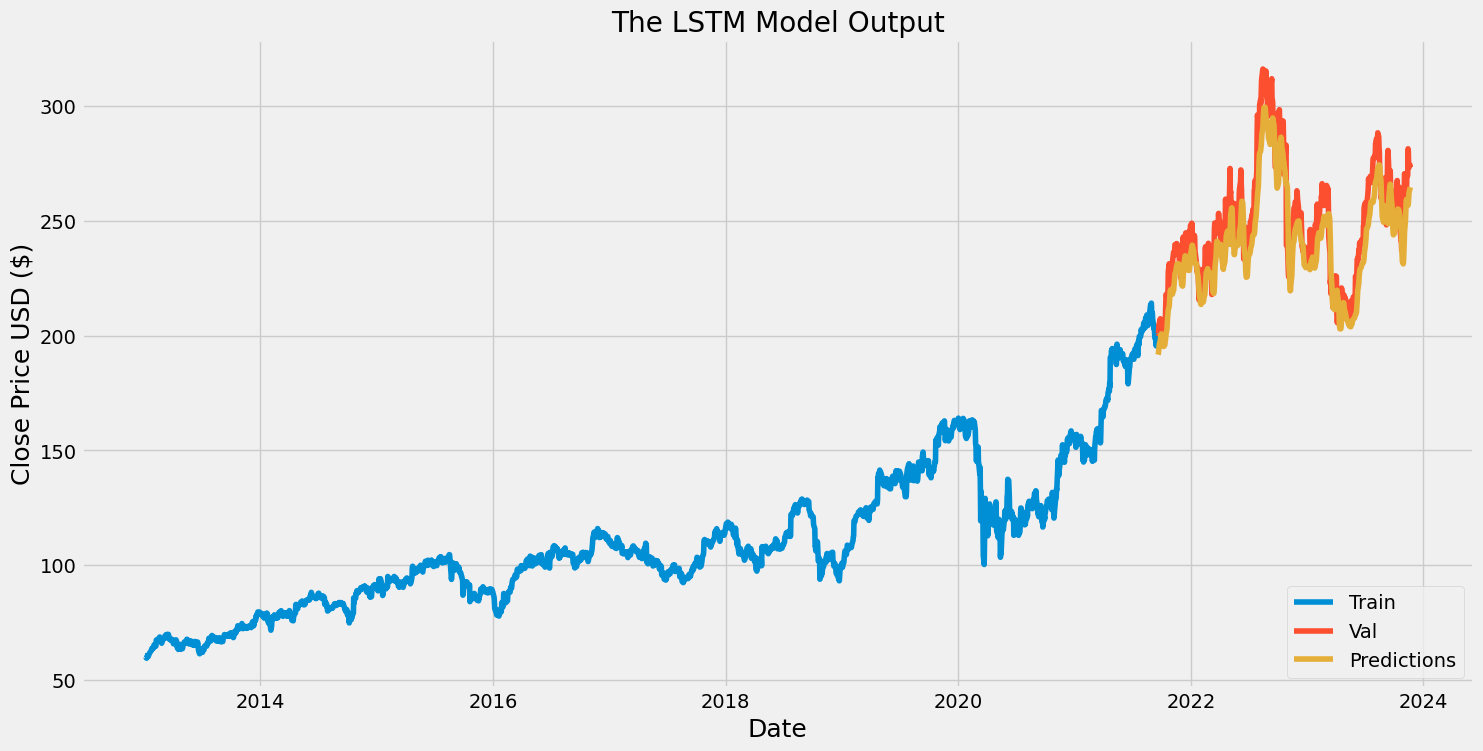

In [63]:
# Plotting the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('The LSTM Model Output')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

**GRU Model**

In [64]:
# The GRU architecture
modelGRU = Sequential()

# First GRU layer with Dropout regularisation
modelGRU.add(GRU(units=50, return_sequences=True, input_shape=(x_train.shape[1],1), activation='tanh'))
modelGRU.add(Dropout(0.2))

# Second GRU layer
modelGRU.add(GRU(units=50, return_sequences=True, input_shape=(x_train.shape[1],1), activation='tanh'))
modelGRU.add(Dropout(0.2))

# Third GRU layer
modelGRU.add(GRU(units=50, return_sequences=True, input_shape=(x_train.shape[1],1), activation='tanh'))
modelGRU.add(Dropout(0.2))

# Fourth GRU layer
modelGRU.add(GRU(units=50, activation='tanh'))
modelGRU.add(Dropout(0.2))

# The output layer
modelGRU.add(Dense(units=1))

In [65]:
# Compiling the model
modelGRU.compile(optimizer="adam", loss='mean_squared_error')

In [66]:
# Fitting the model
modelGRU.fit(x_train, y_train, epochs=40, batch_size=32)

Epoch 1/40
67/67 [==============================] - 20s 143ms/step - loss: 0.0049
Epoch 2/40
67/67 [==============================] - 8s 115ms/step - loss: 8.0849e-04
Epoch 3/40
67/67 [==============================] - 10s 143ms/step - loss: 7.5635e-04
Epoch 4/40
67/67 [==============================] - 9s 131ms/step - loss: 7.0761e-04
Epoch 5/40
67/67 [==============================] - 8s 124ms/step - loss: 6.4713e-04
Epoch 6/40
67/67 [==============================] - 10s 146ms/step - loss: 6.2658e-04
Epoch 7/40
67/67 [==============================] - 8s 120ms/step - loss: 6.1216e-04
Epoch 8/40
67/67 [==============================] - 10s 144ms/step - loss: 5.4261e-04
Epoch 9/40
67/67 [==============================] - 9s 137ms/step - loss: 5.5660e-04
Epoch 10/40
67/67 [==============================] - 8s 119ms/step - loss: 5.3604e-04
Epoch 11/40
67/67 [==============================] - 10s 148ms/step - loss: 4.9776e-04
Epoch 12/40
67/67 [==============================] - 9s 139ms/

In [67]:
# Stock price prediction for the test set and visualisation
GRU_predict = scaler.inverse_transform(modelGRU.predict(x_test))

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((GRU_predict - y_test) ** 2)))
rmse

18/18 [==============================] - 3s 29ms/step


10.72824437578941

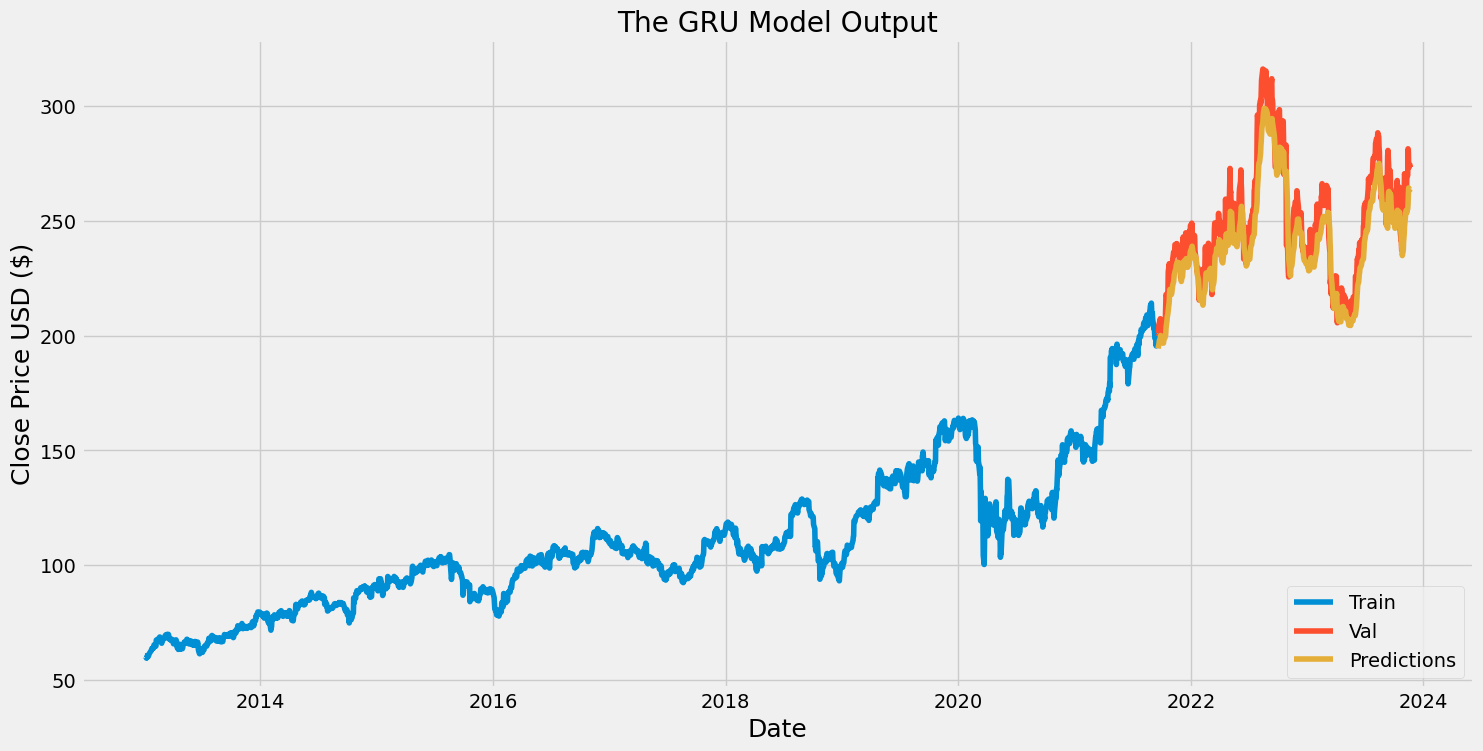

In [68]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['GRU_predict'] = GRU_predict

# Visualize the data
plt.figure(figsize=(16,8))
plt.title('The GRU Model Output')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'GRU_predict']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

**Building the symple RNN model**

In [69]:
from keras.layers import SimpleRNN, Dropout, Dense

from keras.optimizers import Adam

def build_SimpleRNN(input_shape, parameters):
    modelRNN = Sequential()
    modelRNN.add(SimpleRNN(units=parameters['RNN_size'], input_shape=input_shape, return_sequences=True))
    modelRNN.add(Dropout(parameters['dropout']))
    modelRNN.add(SimpleRNN(units=parameters['RNN_size'], return_sequences=True))
    modelRNN.add(Dropout(parameters['dropout']))
    modelRNN.add(SimpleRNN(units=parameters['RNN_size'], return_sequences=False))
    modelRNN.add(Dropout(parameters['dropout']))
    modelRNN.add(Dense(units=parameters['FC_size'], activation='relu'))
    modelRNN.add(Dense(units=1))
    optimizer = Adam(lr=parameters["lr"])
    modelRNN.compile(loss='mse', optimizer=optimizer, metrics=['mse', 'mae'])
    return modelRNN


In [70]:
# Build and train the SimpleRNN model
simple_rnn_parameters = {
    'RNN_size': 50,
    'dropout': 0.2,
    'FC_size': 50,
    'lr': 0.001
}

# Assuming input_shape is correctly defined
simple_rnn_model = build_SimpleRNN(input_shape=(x_train.shape[1], 1), parameters=simple_rnn_parameters)

# Training the model
simple_rnn_model.fit(x_train, y_train, epochs=40, batch_size=32)


Epoch 1/40
67/67 [==============================] - 6s 43ms/step - loss: 0.0422 - mse: 0.0422 - mae: 0.1481
Epoch 2/40
67/67 [==============================] - 4s 57ms/step - loss: 0.0080 - mse: 0.0080 - mae: 0.0693
Epoch 3/40
67/67 [==============================] - 4s 59ms/step - loss: 0.0053 - mse: 0.0053 - mae: 0.0560
Epoch 4/40
67/67 [==============================] - 3s 42ms/step - loss: 0.0040 - mse: 0.0040 - mae: 0.0474
Epoch 5/40
67/67 [==============================] - 3s 43ms/step - loss: 0.0030 - mse: 0.0030 - mae: 0.0414
Epoch 6/40
67/67 [==============================] - 3s 45ms/step - loss: 0.0028 - mse: 0.0028 - mae: 0.0395
Epoch 7/40
67/67 [==============================] - 5s 71ms/step - loss: 0.0024 - mse: 0.0024 - mae: 0.0365
Epoch 8/40
67/67 [==============================] - 3s 43ms/step - loss: 0.0018 - mse: 0.0018 - mae: 0.0324
Epoch 9/40
67/67 [==============================] - 3s 43ms/step - loss: 0.0019 - mse: 0.0019 - mae: 0.0329
Epoch 10/40
67/67 [=========

In [71]:
# Get the predicted price values for the test set
simple_rnn_predictions = simple_rnn_model.predict(x_test)
simple_rnn_predictions = scaler.inverse_transform(simple_rnn_predictions)

18/18 [==============================] - 1s 12ms/step


In [72]:
# Get the RMSE
rmse_simple_rnn = np.sqrt(np.mean(((simple_rnn_predictions - y_test) ** 2)))
print(f'SimpleRNN RMSE: {rmse_simple_rnn}')

SimpleRNN RMSE: 31.211249529286707


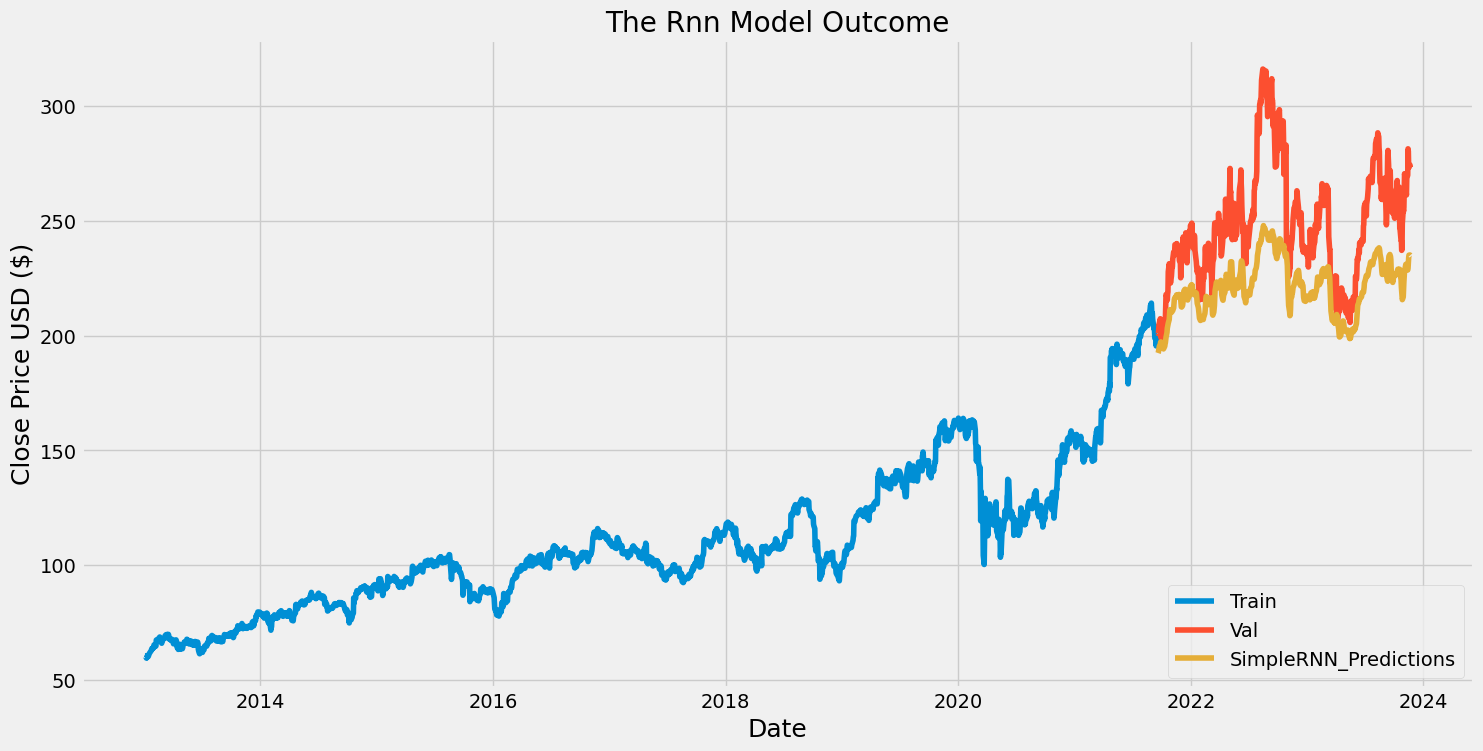

In [73]:
# Plotting the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['SimpleRNN_Predictions'] = simple_rnn_predictions

plt.figure(figsize=(16, 8))
plt.title('The Rnn Model Outcome')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'SimpleRNN_Predictions']])
plt.legend(['Train', 'Val', 'SimpleRNN_Predictions'], loc='lower right')
plt.show()